In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    "t": np.arange(10),
    "value": [3,5,4,7,8,10,9,11,13,12]
})

In [8]:
df['rolling_mean'] = df['value'].rolling(3).mean()
df['rolling_sum'] = df['value'].rolling(3, center=True).sum()

In [9]:
df

,t,value,rolling_mean,rolling_sum
0,0,3,NaN,NaN
1,1,5,NaN,12.0
2,2,4,4.000000,16.0
3,3,7,5.333333,19.0
4,4,8,6.333333,25.0
5,5,10,8.333333,27.0
6,6,9,9.000000,30.0
7,7,11,10.000000,33.0
8,8,13,11.000000,36.0
9,9,12,12.000000,NaN


In [ ]:
df["roll_mean"] = df["value"].rolling(window=3, center=True).mean()
df["value_filled"] = df["value"].fillna(df["roll_mean"])
# Если в value был пропуск — туда подставится среднее соседей.

In [10]:
df = pd.DataFrame({
    "t": [0,1,2,3,4,5],
    "value": [5, np.nan, np.nan, 11, np.nan, 15]
})

In [11]:
df

,t,value
0,0,5.0
1,1,NaN
2,2,NaN
3,3,11.0
4,4,NaN
5,5,15.0


In [14]:
df['value_interp_line'] = df['value'].interpolate()

In [15]:
df

,t,value,value_interp_line
0,0,5.0,5.0
1,1,NaN,7.0
2,2,NaN,9.0
3,3,11.0,11.0
4,4,NaN,13.0
5,5,15.0,15.0


In [ ]:
# Заполнение пропусков с помощью скользящего окна

In [18]:
np.random.seed(42)

t = np.arange(0, 30)

# Базовый тренд + сезонность + шум
value = (
    0.2 * t                     # медленный рост
    + 2 * np.sin(2*np.pi*t/10) # периодические колебания
    + np.random.normal(0, 0.4, size=len(t))
)

df = pd.DataFrame({
    "time": t,
    "value": value
})

# Специально вставляем пропуски в "неудобных местах"
nan_positions = [3, 4, 9, 14, 15, 16, 22, 27]
df.loc[nan_positions, "value"] = np.nan

df

,time,value
0,0,0.198686
1,1,1.320265
2,2,2.561188
3,3,NaN
4,4,NaN
5,5,0.906345
6,6,0.656115
7,7,-0.195139
8,8,-0.489903
9,9,NaN


In [23]:
df["roll_mean"] = df["value"].rolling(window=3, center=True).mean()
df["value_filled_mean"] = df["value"].fillna(df["roll_mean"])
# Если в value был пропуск — туда подставится среднее соседей.

In [25]:
df['inreplolate'] = df['value_filled_mean'].interpolate()

In [29]:
import matplotlib.pyplot as plt

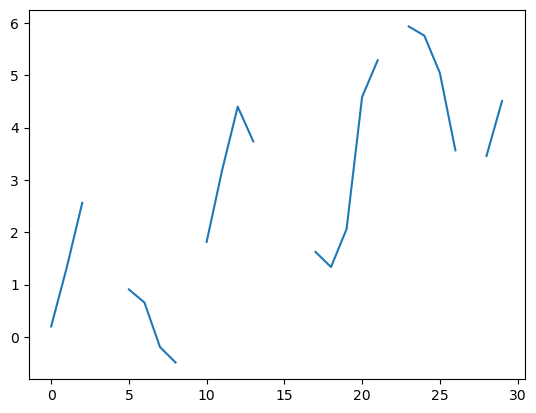

In [30]:
plt.plot(df['value'])

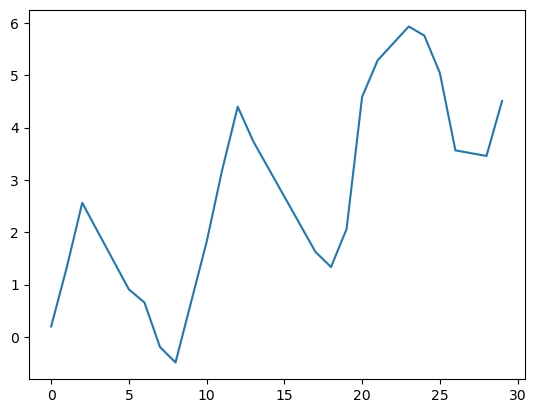

In [32]:
plt.plot(df['inreplolate'])

In [3]:
#pivot table
import pandas as pd

In [4]:
df = pd.DataFrame({
    "user": [1,1,2,2,3,3],
    "day": ["Mon","Tue","Mon","Tue","Mon","Tue"],
    "time_spent": [30,40,20,50,10,25]
})

In [6]:
df.groupby(['user', 'day'], as_index=False)['time_spent'].sum()

,user,day,time_spent
0,1,Mon,30
1,1,Tue,40
2,2,Mon,20
3,2,Tue,50
4,3,Mon,10
5,3,Tue,25


In [13]:
pd.pivot_table(df, index='user', columns='day', values='time_spent', aggfunc="sum")

day,Mon,Tue
user,,
1,30,40
2,20,50
3,10,25


In [14]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    "user_id": [1,1,1,2,2,2,3,3,4,4,4,5,5,6,6,6,7,7,7],
    "month": ["Jan","Jan","Feb","Jan","Feb","Feb",
              "Jan","Mar","Jan","Feb","Mar",
              "Jan","Feb","Jan","Feb","Mar",
              "Jan","Feb","Mar"],
    "event": ["view","click","view",
              "view","view","click",
              "click","view",
              "view","view","click",
              "click","view",
              "view","click","view",
              "view","click","view"],
    "time_spent": [5,2,7, 6,8,3, 4,10, 5,9,2, 1,7, 6,3,8, 4,2,9]
})

In [16]:
pd.pivot_table(df, index='user_id', columns='month', values='time_spent', aggfunc='sum', fill_value=0)

month,Feb,Jan,Mar
user_id,,,
1,7,7,0
2,11,6,0
3,0,4,10
4,9,5,2
5,7,1,0
6,3,6,8
7,2,4,9


In [17]:
#многоуровневая таблица

In [19]:
pd.pivot_table(df, index='user_id', columns=['month', 'event'], values='time_spent', aggfunc='sum', fill_value=0)

month     Feb        Jan        Mar     
event   click view click view click view
user_id                                 
1           0    7     2    5     0    0
2           3    8     0    6     0    0
3           0    0     4    0     0   10
4           0    9     0    5     2    0
5           0    7     1    0     0    0
6           3    0     0    6     0    8
7           2    0     0    4     0    9

In [1]:
# Соединение двух таблиц

In [2]:
import pandas as pd

df_users = pd.DataFrame({
    "user_id": [1, 2, 3, 4],
    "name": ["Anna", "Boris", "Carl", "Dasha"]
})

In [3]:
df_orders = pd.DataFrame({
    "user_id": [2, 3, 3, 5],
    "order_sum": [500, 200, 800, 100]
})

In [4]:
df_users

,user_id,name
0,1,Anna
1,2,Boris
2,3,Carl
3,4,Dasha


In [5]:
df_orders

,user_id,order_sum
0,2,500
1,3,200
2,3,800
3,5,100


In [12]:
df_res = pd.merge(df_orders, df_users, on='user_id', how='left')

In [13]:
df_res

,user_id,order_sum,name
0,2,500,Boris
1,3,200,Carl
2,3,800,Carl
3,5,100,NaN


In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame({
    "color": ["red","blue","green","red"],
    "city": ["Moscow","SPb","Kazan","Moscow"],
    "status": ["ok","fail","ok","warning"]
})

In [15]:
df

,color,city,status
0,red,Moscow,ok
1,blue,SPb,fail
2,green,Kazan,ok
3,red,Moscow,warning


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
enc = LabelEncoder()

In [18]:
for i in ['color', 'city', 'status']:
    df[i] = enc.fit_transform(df[i])

In [19]:
df

,color,city,status
0,2,1,1
1,0,2,0
2,1,0,1
3,2,1,2
